In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Create 100 random points for the first variable
x = np.random.normal(0, 1, 100)

# Generate correlated variables
# To achieve correlation, use linear combinations with added noise
y = 0.7 * x + np.random.normal(0, 0.3, 100)  # Correlated with x
z = 0.7 * y + np.random.normal(0, 0.3, 100)  # Correlated with y and indirectly with x
# Combine into a DataFrame for better visualization
df = pd.DataFrame({'x': x, 'y': y, 'z': z})
df.corr()

,x,y,z
x,1.000000,0.903278,0.788605
y,0.903278,1.000000,0.849798
z,0.788605,0.849798,1.000000


In [3]:
X = df['x']
model_OLS = sm.OLS(y, sm.add_constant(X)).fit(cov_type='HC1')
predictions_OLS = model_OLS.get_prediction(sm.add_constant(X)).summary_frame(alpha=0.05)  # alpha = significance level for confidence interval
residuals_OLS = y - predictions_OLS['mean']
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     342.8
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           9.11e-34
Time:                        14:37:15   Log-Likelihood:                -15.311
No. Observations:                 100   AIC:                             34.62
Df Residuals:                      98   BIC:                             39.83
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0022      0.028      0.079      0.937      -0.053       0.058
x              0.6570      0.035     18.516      0.000       0.587       0.727
==============================================================================
Omnibus:                        1.950   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.377   Jarque-Bera (JB):                1.909
Skew:                           0.327   Prob(JB):                        0.385
Kurtosis:                       2.829   Cond. No.                         1.16
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [4]:
np.corrcoef(z,residuals_OLS)

array([[1.        , 0.32039823],
       [0.32039823, 1.        ]])

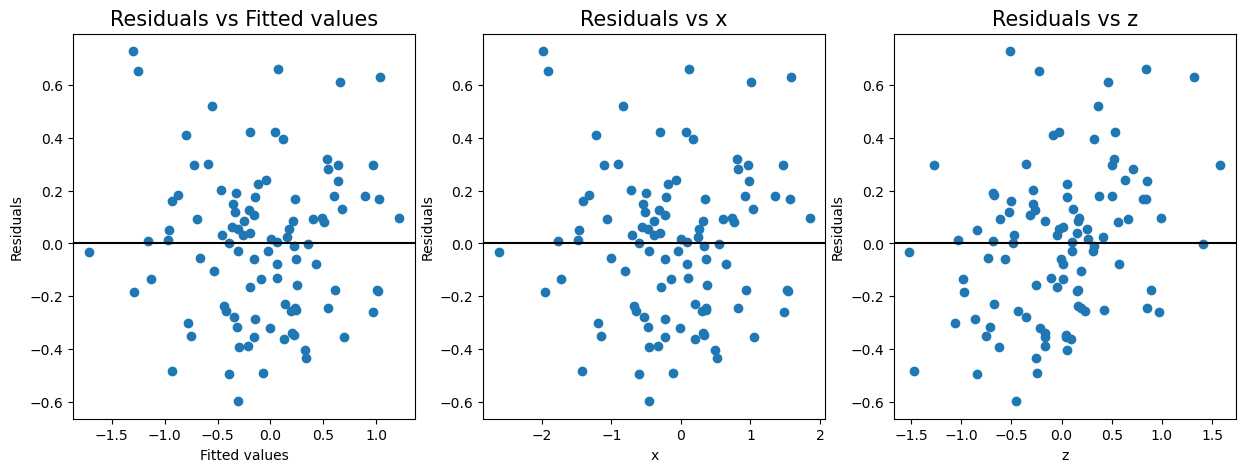

In [5]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
axes = ax.flatten()
axes[0].scatter(x=predictions_OLS['mean'], y=residuals_OLS)
axes[0].set_title('Residuals vs Fitted values', fontsize=15)
axes[0].set_xlabel('Fitted values')
axes[0].set_ylabel('Residuals')
axes[0].axhline(y=0, color='black')

for idx, predictor in enumerate(['x', 'z']):
    axes[idx+1].scatter(x=df[predictor], y=residuals_OLS)
    axes[idx+1].set_title('Residuals vs {}'.format(predictor), fontsize=15)
    axes[idx+1].set_xlabel('{}'.format(predictor))
    axes[idx+1].set_ylabel('Residuals')
    axes[idx+1].axhline(y=0, color='black')

plt.show()

<Axes: xlabel='x', ylabel='mean'>

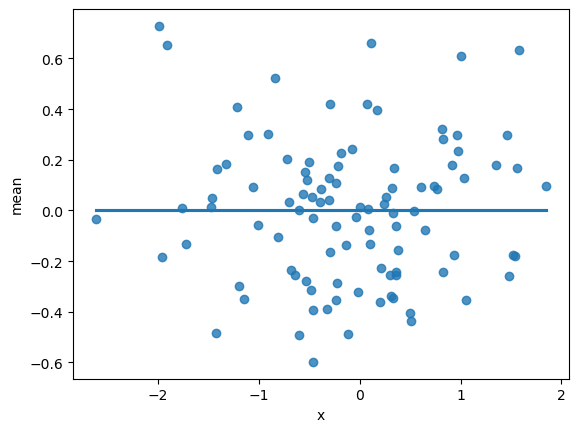

In [6]:
import seaborn as sns
sns.regplot(x=df['x'], y=residuals_OLS, ci=None)

In [7]:
X = df['z']
model_OLS = sm.OLS(y, sm.add_constant(X)).fit(cov_type='HC1')
predictions_OLS = model_OLS.get_prediction(sm.add_constant(X)).summary_frame(alpha=0.05)  # alpha = significance level for confidence interval
residuals_OLS = y - predictions_OLS['mean']
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           4.32e-25
Time:                        14:37:16   Log-Likelihood:                -35.893
No. Observations:                 100   AIC:                             75.79
Df Residuals:                      98   BIC:                             81.00
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0413      0.035     -1.169      0.242      -0.111       0.028
z              0.9227      0.066     13.989      0.000       0.793       1.052
==============================================================================
Omnibus:                        1.579   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.454   Jarque-Bera (JB):                1.223
Skew:                           0.267   Prob(JB):                        0.542
Kurtosis:                       3.095   Cond. No.                         1.65
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [9]:
X = df[['x','z']]
model_OLS = sm.OLS(y, sm.add_constant(X)).fit(cov_type='HC1')
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     278.7
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           6.18e-41
Time:                        14:37:23   Log-Likelihood:                0.52758
No. Observations:                 100   AIC:                             4.945
Df Residuals:                      97   BIC:                             12.76
Df Model:                           2                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0089      0.025     -0.361      0.718      -0.057       0.039
x              0.4485      0.049      9.126      0.000       0.352       0.545
z              0.3948      0.076      5.225      0.000       0.247       0.543
==============================================================================
Omnibus:                        1.191   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.551   Jarque-Bera (JB):                1.269
Skew:                           0.210   Prob(JB):                        0.530
Kurtosis:                       2.641   Cond. No.                         3.32
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [10]:
import numpy as np
import pandas as pd

np.random.seed(42)  # For reproducibility

# Generate x as a random variable
x = np.random.normal(0, 1, 1000)

# Generate y correlated with x
y = 0.8 * x + np.random.normal(0, 0.6, 1000)

# Step 3: Generate z independently of x and y, then induce correlation with y
z = np.random.normal(0, 1, 1000)  # z independent of x and y
# Now we will introduce correlation between y and z by scaling z
# Ensure the correlation between y and z is controlled
correlation_yz = 0.7  # Desired correlation between y and z
z = correlation_yz * y + np.sqrt(1 - correlation_yz**2) * np.random.normal(0.1, 1, 1000)


# Create a DataFrame to calculate and display correlations
data = pd.DataFrame({'x': x, 'y': y, 'z': z})

# Calculate correlations
correlations = data.corr()
print(correlations)

          x         y         z
x  1.000000  0.785577  0.534835
y  0.785577  1.000000  0.659976
z  0.534835  0.659976  1.000000


<Axes: >

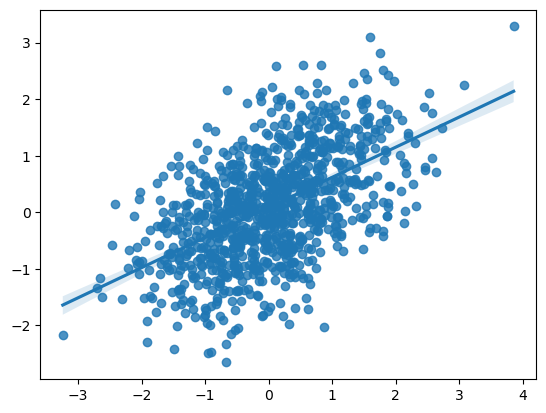

In [11]:
sns.regplot(x=x,y=z)

In [2]:
np.random.seed(42)
area_1 = np.random.normal(10, 3, 100)
crime_1 = 0
price_1 = 15000 + 8000 * area_1 + np.random.normal(10000, 7000, 100)
data1 = pd.DataFrame([area_1, price_1]).T
data1.columns = ['area','price']
data1['crime'] = 0

area_2 = np.random.normal(7, 3, 100)
crime_2 = 1

price_2 = 3000 + 8000 * area_2 + np.random.normal(10000, 7000, 100)
data2 = pd.DataFrame([area_2, price_2]).T
data2.columns = ['area','price']
data2['crime'] = 1

In [3]:
data = pd.concat([data1,data2])
data.corr()

,area,price,crime
area,1.000000,0.957143,-0.385409
price,0.957143,1.000000,-0.541782
crime,-0.385409,-0.541782,1.000000


In [4]:
data['areaXcrime'] = data['area']*data['crime']

In [6]:
X = data[['crime', 'area']]

X = data[['area','crime','areaXcrime']]
y = data['price']
model_OLS = sm.OLS(y, sm.add_constant(X)).fit(cov_type='HC1')
predictions_OLS = model_OLS.get_prediction(sm.add_constant(X)).summary_frame(alpha=0.05)  # alpha = significance level for confidence interval
residuals_OLS = y - predictions_OLS['mean']
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1551.
Date:                Sat, 11 Jan 2025   Prob (F-statistic):          3.01e-136
Time:                        18:12:42   Log-Likelihood:                -2035.7
No. Observations:                 200   AIC:                             4079.
Df Residuals:                     196   BIC:                             4093.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.839e+04   2820.526     10.067      0.000    2.29e+04    3.39e+04
area        7665.7333    275.993     27.775      0.000    7124.797    8206.669
crime      -1.464e+04   3105.606     -4.715      0.000   -2.07e+04   -8556.360
areaXcrime   333.7738    323.590      1.031      0.302    -300.451     967.998
==============================================================================
Omnibus:                        2.643   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.267   Jarque-Bera (JB):                2.703
Skew:                           0.269   Prob(JB):                        0.259
Kurtosis:                       2.813   Cond. No.                         78.0
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [7]:
(7665.7333+7665.7333+333.7738)/2	

7832.6202

In [34]:
data.corr()

,area,price,crime,areaXcrime,resid
area,1.000000e+00,0.957143,-3.854093e-01,0.054527,2.138905e-15
price,9.571427e-01,1.000000,-5.417819e-01,-0.117556,2.208444e-01
crime,-3.854093e-01,-0.541782,1.000000e+00,0.843729,-8.730290e-16
areaXcrime,5.452668e-02,-0.117556,8.437292e-01,1.000000,2.645012e-02
resid,2.138905e-15,0.220844,-8.730290e-16,0.026450,1.000000e+00


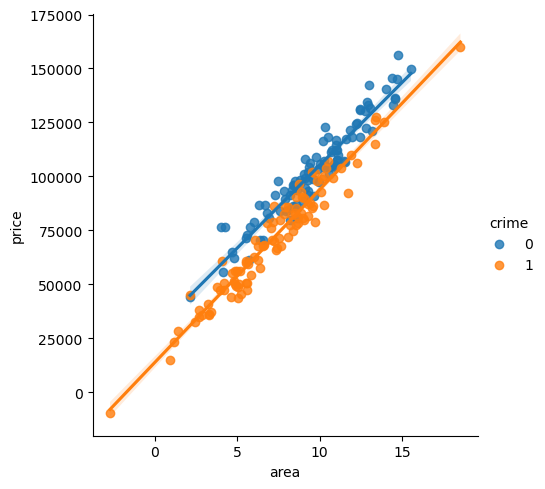

In [29]:
sns.lmplot(x='area', y='price', data=data, hue='crime')

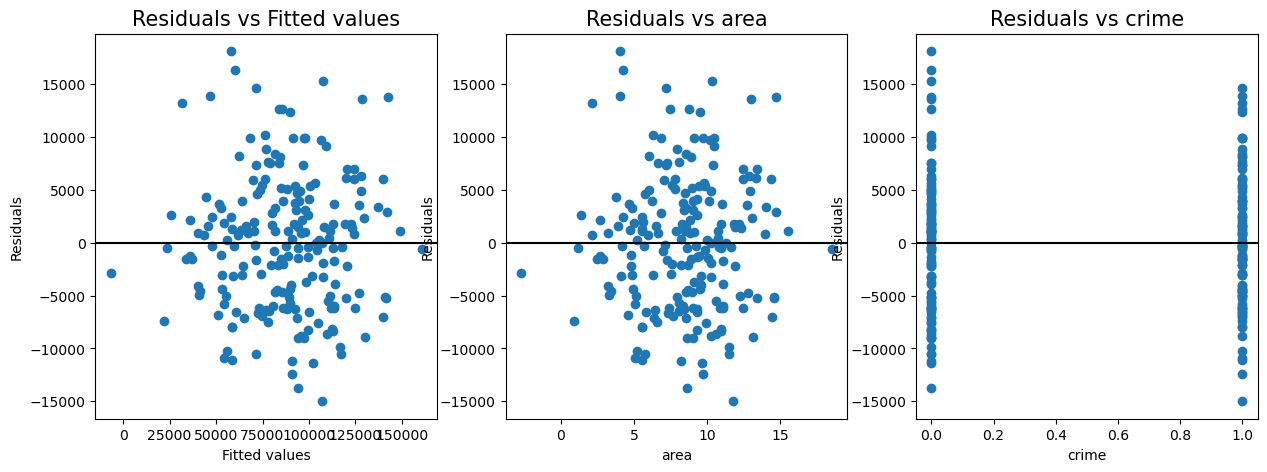

In [17]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
axes = ax.flatten()
axes[0].scatter(x=predictions_OLS['mean'], y=residuals_OLS)
axes[0].set_title('Residuals vs Fitted values', fontsize=15)
axes[0].set_xlabel('Fitted values')
axes[0].set_ylabel('Residuals')
axes[0].axhline(y=0, color='black')

for idx, predictor in enumerate(['area', 'crime']):
    axes[idx+1].scatter(x=data[predictor], y=residuals_OLS)
    axes[idx+1].set_title('Residuals vs {}'.format(predictor), fontsize=15)
    axes[idx+1].set_xlabel('{}'.format(predictor))
    axes[idx+1].set_ylabel('Residuals')
    axes[idx+1].axhline(y=0, color='black')

plt.show()

<Axes: xlabel='area', ylabel='resid'>

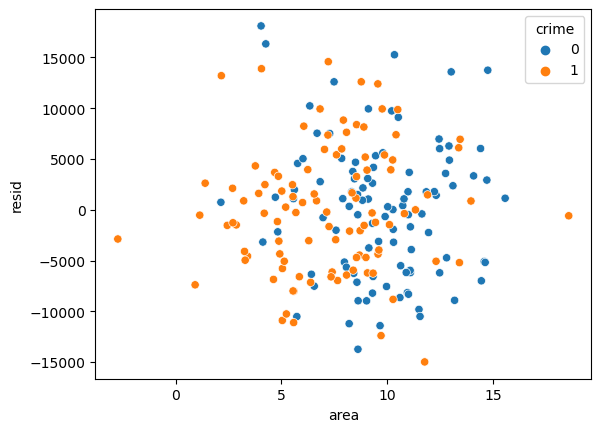

In [18]:
data['resid'] = residuals_OLS
sns.scatterplot(x='area', y='resid', data=data, hue='crime')

In [19]:
np.corrcoef(data.resid, data)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 200 and the array at index 1 has size 5

In [ ]:
residual_cov_matrix = np.cov(residuals_OLS, rowvar=False)
residual_cov_matrix